<a href="https://colab.research.google.com/github/Sumaiya607/Data-Analysis-projects/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns' ,None)


In [2]:
dataset =pd.read_csv('/content/All the Intermediate Colleges in Pakistan.csv')

## Print shape of dataset with rows and columns
print(dataset.shape)

(1630, 6)


In [3]:
## Print the top 5 records
dataset.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [4]:
## Understanding the data types and check for missing values.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


This shows that Sector and Affiliation columns have significant missing data.

In [5]:
dataset.describe(include='all')

,Name,Location,Study Program,Sector,Affiliation,Rating
count,1630,1626,1630,1101,155,1630
unique,1630,1573,774,2,97,21
top,Campus.pk Lahore,Chakwal,FA ICS Computer Science FSc Pre Medical FSc Pr...,Private,University of Sargodha,0*
freq,1,11,49,562,7,1119


**INTERPRETATIONS**

**Name:** Each row represents a unique college.

**Location:** Some cities/regions have multiple colleges listed, with "Chakwal" being the most frequent.

**Study Program:** While there are many study programs, some are more common and offered widely across colleges.

**Sector:** There are more private colleges than public ones in the dataset.

**Affiliation:** Most colleges have missing or unspecified affiliations, but "University of Sargodha" is the most common among those listed.

**Rating:**  A significant number of colleges have a "0*" rating, suggesting either low ratings or potentially placeholder/missing information.

 **Analyzing Location:** Distribution of Colleges Across Different Regions

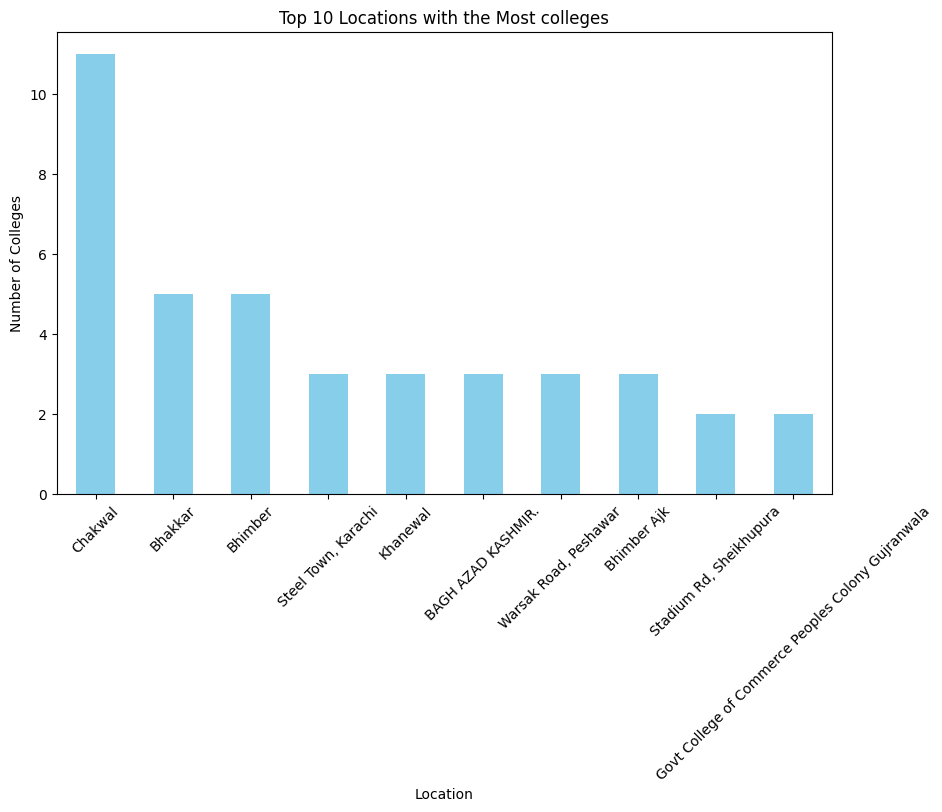

In [6]:
## counting the number of colleges in each location
location_counts=dataset['Location'].value_counts()

 ## ploting the distribution of colleges by location (top 10)
plt.figure(figsize=(10,6))
location_counts.head(10).plot(kind='bar',color='skyblue')
plt.title('Top 10 Locations with the Most colleges')
plt.xlabel('Location')
plt.ylabel('Number of Colleges')
plt.xticks(rotation=45)
plt.show()

 **Analyzing Study Program:** Most Common Study Programs

<function matplotlib.pyplot.show(close=None, block=None)>

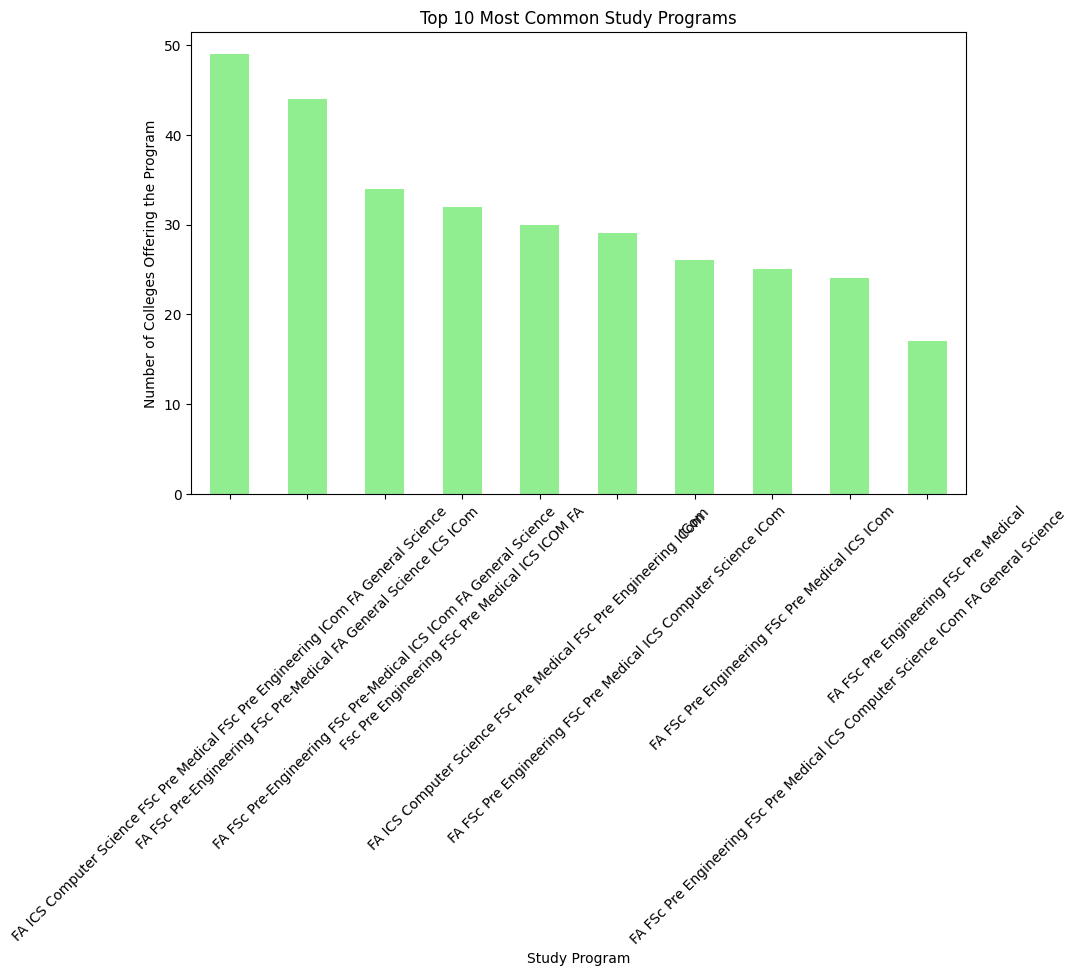

In [7]:
## couning the occurences of each study program
study_program_counts=dataset['Study Program'].value_counts()

## plotting the top 10 most common study programs
plt.figure(figsize=(10,6))
study_program_counts.head(10).plot(kind='bar',color='lightgreen')
plt.title('Top 10 Most Common Study Programs')
plt.xlabel('Study Program')
plt.ylabel('Number of Colleges Offering the Program')
plt.xticks(rotation=45)
plt.show

**Analyzing Sector:** Comparing Public vs. Private Institutions

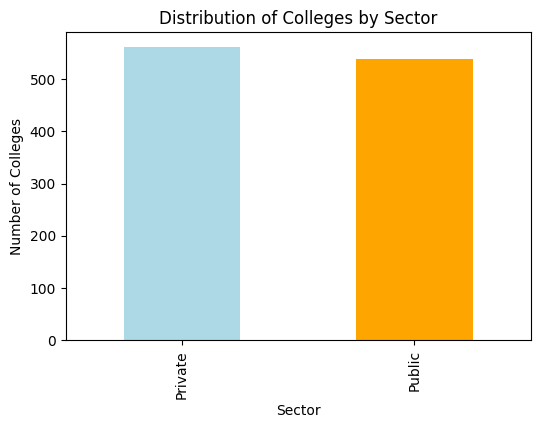

In [8]:
sector_count = dataset['Sector'].value_counts()

## ploting the distribution puclic vs. private colleges
plt.figure(figsize=(6, 4))
sector_count.plot(kind= 'bar' , color=['lightblue','orange'])
plt.title('Distribution of Colleges by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Colleges')
plt.show()

**Analyzing Affiliation:** Exploring Variations in Performance by Affiliation

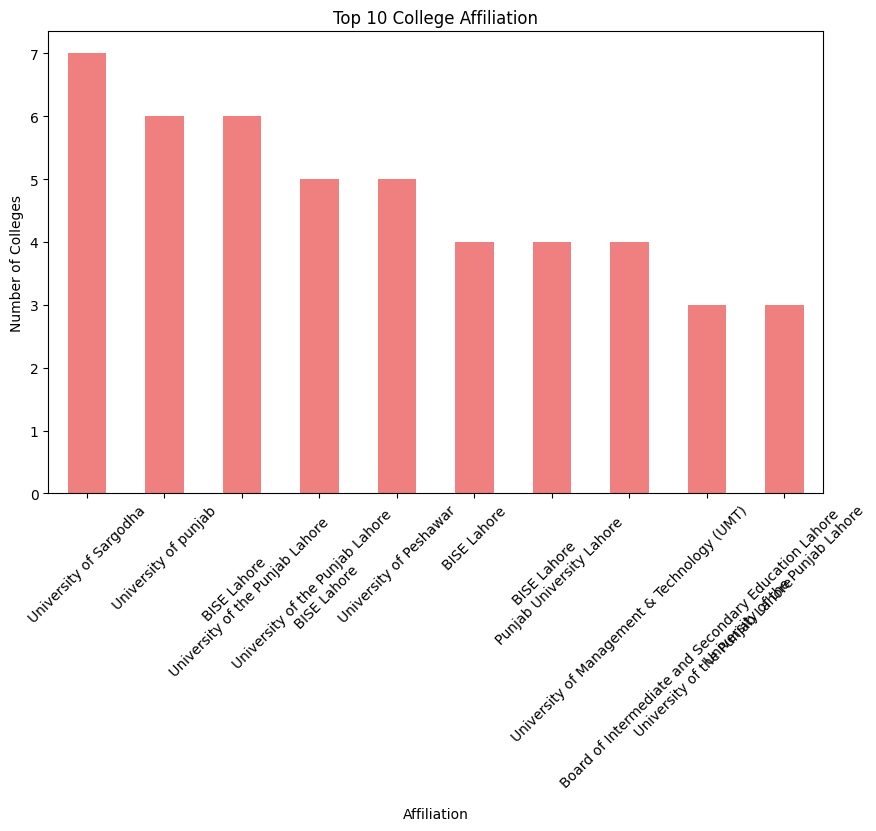

In [9]:
affiliation_counts = dataset['Affiliation'].value_counts()

## plotting the top 10 affiliation
plt.figure(figsize=(10,6))
affiliation_counts.head(10).plot(kind='bar', color='lightcoral')
plt.xlabel('Affiliation')
plt.ylabel('Number of Colleges')
plt.title('Top 10 College Affiliation')
plt.xticks(rotation=45)
plt.show()

**Analyzing Rating:** Investigating What Factors Correlate with Higher or Lower Ratings

<ipython-input-10-37871a02fd2f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Rating', order=rating_counts.index, palette='viridis')


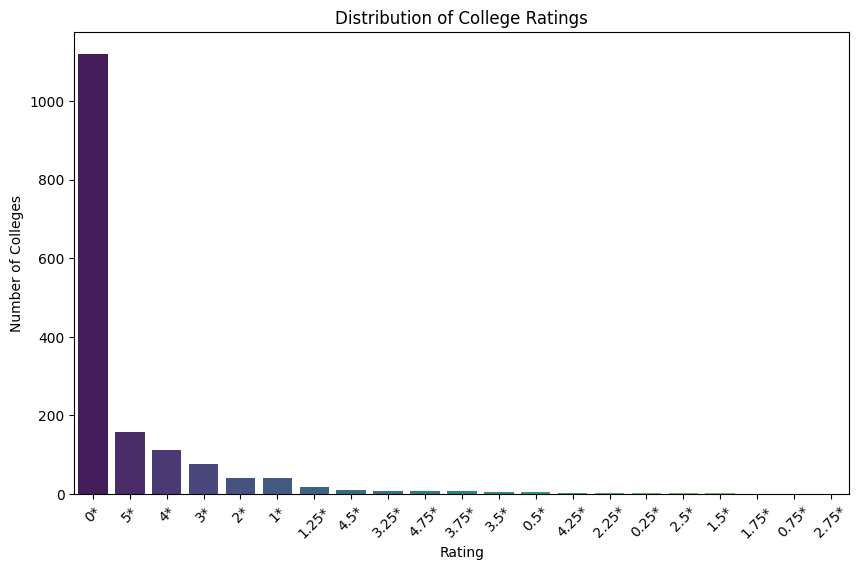

In [10]:
rating_counts = dataset['Rating'].value_counts()

##plotting the distributionsof ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Rating', order=rating_counts.index, palette='viridis')
plt.title('Distribution of College Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Colleges')
plt.xticks(rotation=45)
plt.show()



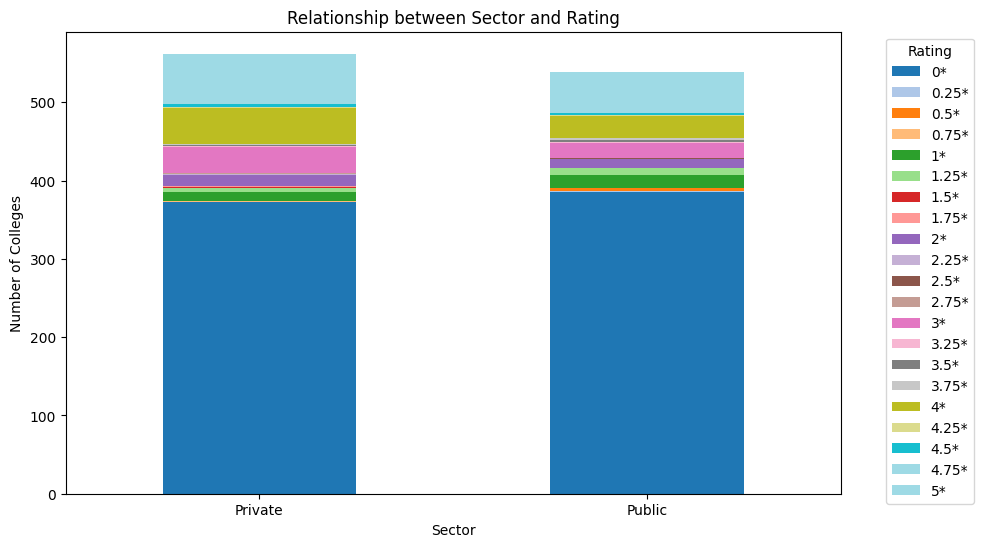

In [11]:
## Cross-tabulation of sector and rating
sector_rating_crosstab = pd.crosstab(dataset['Sector'], dataset['Rating'])

## plotting the relationship
sector_rating_crosstab.plot(kind='bar',stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Relationship between Sector and Rating')
plt.xlabel('Sector')
plt.ylabel('Number of Colleges')
plt.xticks(rotation=0)
plt.legend(title='Rating', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

## **DATA CLEANING**

In [12]:
## imputing missing affiliation values with "Unknown"
dataset['Affiliation'].fillna('Unknown', inplace=True)
dataset.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,Unknown,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,Unknown,5*


In [13]:
## Investigating whether the missing values in the sector column have any patterns or correlation with other variables (e.g location, study, program, affiliation)

## check for patterns in missing data
print(dataset[dataset['Sector'].isnull()].groupby(['Location', 'Study Program']).size())


Location                                                                               Study Program                                                                                                                                                   
 Forest Institute Peshawar                                                             F.Sc                                                                                                                                                                1
 Navy War College Shahra-e-Quaid-e-Azam Post Box 1019 01 Bromhead Road LAHORE - 54000  FA ICS FSc Pre Engineering FSc Pre Medical ICom                                                                                                                     1
1 Noon Avenue, New Muslim Town Lahore                                                  FSc Pre Engineering Fsc Pre Medical ICom ICs Computer Science FSc General Science                                                                              

In [14]:

## Group by Location and study Program to find the most common sector for similar combinations
most_common_sector=dataset.groupby(['Location','Study Program'])['Sector'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

## Impuing missing sector values based on the most common sector for the similar combinations
dataset ['Sector'] = dataset.apply(
    lambda x :most_common_sector.get((x['Location'], x['Study Program']),'Unknown')
    if pd.isnull(x['Sector']) else x['Sector'], axis=1
)

## Filling any remaining missing values with 'Unknown' as a Fallback
dataset['Sector'].fillna('Unknown', inplace=True)

In [15]:
# Filter the dataset to get rows where 'Location' is missing
missing_location_colleges = dataset[dataset['Location'].isnull()]

# Display the names of the colleges with missing 'Location'
print(missing_location_colleges['Name'])





63                                 Murray College Sialkot
865     Institute of Cost and Management Accountants o...
1304    College of Pathologists Pakistan (COPPK), Karachi
1446         Pakistan Aimed Education Colleges Faisalabad
Name: Name, dtype: object


In [16]:
## Getting the indices of the rows with missing 'Location'
missing_location_indices = dataset[dataset['Location'].isnull()].index

## Check if there are any missing locations before imputation
if len(missing_location_indices) > 0:
    ## Imputing the missing locations
    dataset.loc[missing_location_indices[0], 'Location'] = 'Mohallah College Road, Circular Rd, Sialkot'
    dataset.loc[missing_location_indices[1], 'Location'] = 'ICMA Pakistan Building 42 Ferozepur Road, Lahore'
    dataset.loc[missing_location_indices[2], 'Location'] = 'Sindh,Karachi'
    dataset.loc[missing_location_indices[3], 'Location'] = 'Punjab,Faisalabad'

    ## Verifing the imputation
    print(dataset.loc[missing_location_indices, ['Name', 'Location']])
else:
    print("No missing 'Location' values found.")


                                                   Name  \
63                               Murray College Sialkot   
865   Institute of Cost and Management Accountants o...   
1304  College of Pathologists Pakistan (COPPK), Karachi   
1446       Pakistan Aimed Education Colleges Faisalabad   

                                              Location  
63         Mohallah College Road, Circular Rd, Sialkot  
865   ICMA Pakistan Building 42 Ferozepur Road, Lahore  
1304                                     Sindh,Karachi  
1446                                 Punjab,Faisalabad  


**Handling Duplicates below**

In [17]:
## check for duplicates
duplicate_rows = dataset.duplicated()

## if duplicates exist, remove them
if duplicate_rows.sum() > 0:
     dataset = dataset.drop_duplicates()
     print(f" Removed {duplicate_rows.sum()} duplicagte rows.")
else:
     print("No duplicate rows found.")


No duplicate rows found.


**Standardizing and Cleaning Categorical Data**

In [18]:
categorical_columns = ['Sector','Affiliation','Study Program']
for column in categorical_columns:
    dataset[column] = dataset[column].str.strip().str.lower()

**Handling Outliers**


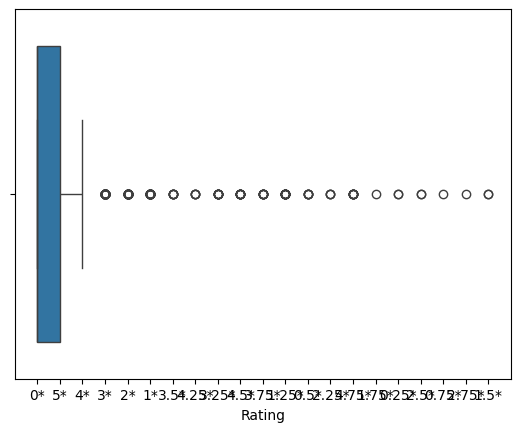

In [19]:
sns.boxplot(data=dataset, x='Rating')
plt.show()


In [20]:
# Optionally, handle outliers (e.g., cap extreme values)
lower_bound = 1  # Define the lower bound for ratings
upper_bound = 5  # Define the upper bound for ratings
# Convert the 'Rating' column to numeric, handling non-numeric values as errors
dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')
# Apply the lambda function to cap the ratings
dataset['Rating'] = dataset['Rating'].apply(lambda x: 0 if x == 0 else min(max(x, lower_bound), upper_bound))


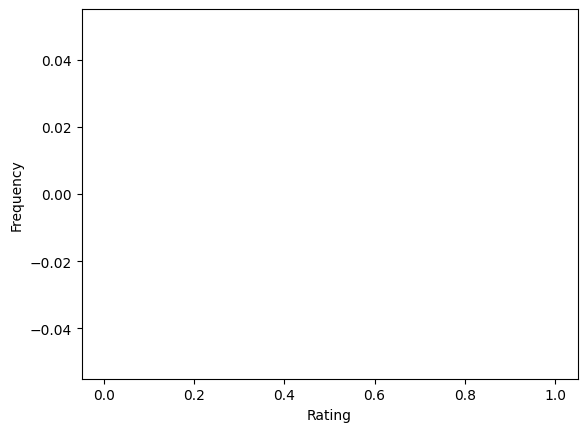

In [22]:
# Histogram to see the distribution
plt.hist(dataset['Rating'].dropna()) #Added dropna() to remove NaN values
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Encoding** SECTOR

In [23]:
## One-hot encode the 'Sector' column
sector_dummies = pd.get_dummies(dataset['Sector'], prefix='Sector')
dataset = pd.concat([dataset, sector_dummies], axis=1)


In [24]:
# Convert Rating to numeric if needed
dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')


# **FEATURE** **ENGINEERING**

In [25]:
# Extracting the city name (assuming the city is at the end of the address)
dataset['City'] = dataset['Location'].apply(lambda x: x.split(',')[-1].strip().lower())

# Example: Group by city and analyze trends
print(dataset['City'].value_counts())


City
lahore                                               84
islamabad                                            75
                                                     67
karachi                                              51
rawalpindi                                           45
                                                     ..
near sadar police station chishtian                   1
g.t road near bodla house mian channu                 1
govt post graduate college chishtian bahawalnagar     1
model town near fc-hq                                 1
riphah international college dargai                   1
Name: count, Length: 990, dtype: int64


In [26]:
import re

# Comprehensive list of valid city names (you should expand this list)
valid_cities = [
    'lahore', 'karachi', 'islamabad', 'rawalpindi', 'faisalabad', 'sialkot',
    'multan', 'quetta', 'peshawar', 'hyderabad', 'bahawalpur', 'sargodha',
    'gujranwala', 'gujrat', 'sukkur', 'abbottabad', 'mardan', 'rahim yar khan' # Removed the ellipsis
]

# Function to extract valid city names
def extract_city(location):
    # Convert to lowercase to standardize matching
    location_lower = location.lower()

    # First, check for any exact matches with known cities
    for city in valid_cities:
        if city in location_lower:
            return city

    # If no city from the list is found, mark as 'Unknown'
    return 'Unknown'

# Apply the function to clean city names
dataset['City'] = dataset['Location'].apply(extract_city)

# Example: Group by city and analyze trends
print(dataset['City'].value_counts())


City
Unknown           531
lahore            223
rawalpindi        126
islamabad         122
karachi           109
faisalabad         94
peshawar           82
gujranwala         62
sargodha           57
multan             49
bahawalpur         37
gujrat             35
sialkot            31
abbottabad         27
quetta             14
mardan             10
hyderabad          10
rahim yar khan      8
sukkur              3
Name: count, dtype: int64


In [27]:
# Filter the dataset for rows with 'Unknown' city
unknown_cities = dataset[dataset['City'] == 'Unknown']

# Display the first 10 rows
first_10_unknown = unknown_cities.head(10)
print(first_10_unknown[['Name', 'Location']])  # Display the college name and full location


                                                  Name  \
48       Allama Iqbal Open University AIOU Abbottabad.   
84                               Cadet College, Jhelum   
110                                Cadet College Kohat   
111  Limkokwing University Of Creative Technology (...   
117                             Kips Academy Islamabad   
126                                      STUDENTS’ INN   
134                 Govt Post Graduate College Sahiwal   
143                  Punjab College of Commerce Multan   
147                 Cadet College Kallar Kahar Chakwal   
153  Govt Post Graduate College Satellite Town Gujr...   

                                              Location  
48   House No. CB 301, Adj. United Bank Ltd, Main B...  
84   Pir Shahab GT Road Jhelum, Post Box No.30 (GPO...  
110                                Cadet College Kohat  
111  Inovasi 1-1, Jalan Teknokrat 1/1, 63000 Cyberj...  
117  21-B Metropolitian Plaza , Near National Bank ...  
126             Jun

In [29]:
# Define function to classify study programs into broader categories
def classify_programs(program):
    if 'science' in program.lower() or 'f.sc' in program.lower() or 'ics' in program.lower():
        return 'Science'
    elif 'commerce' in program.lower() or 'i.com' in program.lower():
        return 'Commerce'
    elif 'arts' in program.lower() or 'fa' in program.lower():
        return 'Arts'
    else:
        return 'Other'

# Apply the function to create a new feature
dataset['Program_Category'] = dataset['Study Program'].apply(classify_programs)

# Check the distribution
print(dataset['Program_Category'].value_counts())


Program_Category
Science     1327
Other        177
Arts         116
Commerce      10
Name: count, dtype: int64


In [30]:
def classify_programs(program):
    program = program.lower()

    # Science-related programs
    if 'science' in program or 'f.sc' in program or 'ics' in program:
        return 'Science'

    # Commerce-related programs
    elif 'commerce' in program or 'i.com' in program or 'dcom' in program:
        return 'Commerce'

    # Arts-related programs
    elif 'arts' in program or 'fa' in program:
        return 'Arts'

    # Technical/Vocational programs (DAE, diplomas)
    elif 'dae' in program or 'diploma' in program:
        return 'Technical/Vocational'

    # Medical Technology programs
    elif 'medical' in program or 'physiotherapy' in program or 'lab' in program:
        return 'Medical Technology'

    # Professional certifications (ACCA, CIMA, CMA)
    elif 'acca' in program or 'cima' in program or 'cma' in program:
        return 'Professional'

    # Mixed programs with more than one category
    elif ('f.sc' in program or 'ics' in program) and ('i.com' in program or 'fa' in program or 'acca' in program):
        return 'Mixed Programs'

    # Catch-all for remaining programs
    else:
        return 'Other'

# Apply the updated classification function
dataset['Program_Category'] = dataset['Study Program'].apply(classify_programs)

# Check the updated distribution
print(dataset['Program_Category'].value_counts())


Program_Category
Science                 1327
Arts                     101
Commerce                  66
Other                     50
Medical Technology        36
Technical/Vocational      25
Professional              25
Name: count, dtype: int64


**STANDARDIZING LOCATION**

**Working on unknown cities**

In [31]:
!pip install rapidfuzz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.9 MB/s eta 0:00:00


In [32]:
import pandas as pd
import re
from rapidfuzz import process, fuzz

# Define known cities and provinces
cities = [
    'Abbottabad', 'Attock','Ahmadpur East', 'Ahmadpur Sial', 'Alipur', 'Arifwala', 'Aliabad', 'Allahabad', 'Alpuri', 'Amangarh', 'Andrabi', 'Angoori', 'Arababad', 'Ashiqabad',
    'Athmuqam', 'Awaran', 'Ali Bandar', 'Astore', 'Akora Khattak', 'Ahmedpur', 'Alizai', 'Adezai',
    'Bahawalpur', 'Bannu', 'Bahawalnagar', 'Bajaur', 'Banda Daud Shah', 'Bannu', 'Barikot', 'Barkhan', 'Basirpur', 'Batagram', 'Battagram',
    'Bhakkar', 'Bhalwal', 'Bhera', 'Bhimber', 'Bhurban', 'Bilanar', 'Bisham', 'Boi', 'Bozai', 'Buner',
    'Chagai', 'Chahar', 'Chakwal', 'Chaman', 'Charsadda', 'Chashma', 'Chawinda', 'Chichawatni', 'Chiniot', 'Chitral', 'Chuhar Kana', 'Chunian',
    'Churatta', 'Civil Lines','Chiniot',
    'Dadu', 'Daggar', 'Dajal', 'Dandot', 'Dargai', 'Daska', 'Daultala', 'Dera Allah Yar', 'Dera Bugti', 'Dera Ghazi Khan', 'Dera Ismail Khan', 'Dera Murad Jamali', 'Dhoro Naro', 'Dijkot', 'Dina', 'Dinga', 'Dipalpur', 'Dokri',
    'Dera Ghazi Khan',
    'Faisalabad',
    'Gujranwala', 'Gujrat',
    'Hyderabad',
    'Islamabad','Islamkot', 'Isa Khel', 'Ibrahim Hyderi', 'Ichkhanabad', 'Ibrahimabad', 'Iqbal Nagar', 'Islamgarh', 'Ispur', 'Ibrahim Khan',
    'Jacobabad', 'Jhang', 'Jhelum',
    'Karachi', 'Kasur', 'Khushab','Kabirwala', 'Kahuta', 'Kakul', 'Kamalia', 'Kambar', 'Kandhkot', 'Kanganpur', 'Karak','Kashmore','Keti Bandar', 'Khairpur', 'Khairpur Tamewali', 'Khanewal', 'Khanpur', 'Kharan', 'Kharian', 'Khyber', 'Kohat', 'Kohlu', 'Kot Addu',
    'Kot Fatuhai', 'Kot Ghulam Muhammad', 'Kot Radha Kishan', 'Kotli', 'Kunri',
    'Lahore', 'Larkana','Lakki Marwat', 'Lala Musa', 'Lalian', 'Landi Kotal', 'Larkana', 'Lasbela', 'Layyah', 'Liaquatpur', 'Lodhran', 'Loralai',
    'Mardan','Mianwali', 'Mirpur', 'Multan', 'Murree', 'Muzaffarabad',
    'Narowal', 'Nawabshah',
    'Okara', 'Peshawar',
    'Quetta',
    'Rahim Yar Khan', 'Rawalpindi',
    'Sahiwal', 'Sargodha', 'Sialkot', 'Sukkur','Sahiwal', 'Sadiqabad', 'Saidu Sharif', 'Sambrial', 'Sanghar', 'Sargodha',
    'Shahdadkot', 'Shahdadpur', 'Shahkot', 'Shangla', 'Sharaqpur',
    'Sheikhupura', 'Shikarpur', 'Shujabad', 'Sialkot', 'Sibi', 'Sillanwali', 'Sohawa', 'Sukkur', 'Swabi', 'Swat',
    'Tando Allahyar', 'Tando Muhammad Khan',
    'Thatta',
    'Vehari'
]
provinces = ['Punjab', 'Sindh', 'KPK', 'Balochistan']

# Define a function that uses fuzzy matching for better city matching
def match_city_province(location_part, known_cities, known_provinces):
    # Fuzzy match city
    city_match = process.extractOne(location_part, known_cities, scorer=fuzz.partial_ratio)
    if city_match and city_match[1] >= 80:  # Adjust the threshold as needed
        return city_match[0], "City"

    # Fuzzy match province
    province_match = process.extractOne(location_part, known_provinces, scorer=fuzz.partial_ratio)
    if province_match and province_match[1] >= 80:
        return province_match[0], "Province"

    return None, None

# Define the function to reorder location with enhanced city and province extraction
def reorder_location(location):
    # Handle cases where location is not a string (e.g., NaN or missing values)
    if not isinstance(location, str):
        return None

    # Initialize placeholders for region, city, and province
    region = None
    city = None
    province = None

    # Clean the location string and split by commas
    location_parts = [part.strip() for part in location.split(',')]

    # Extract city and province using fuzzy matching
    for part in location_parts:
        match, match_type = match_city_province(part, cities, provinces)
        if match_type == "City":
            city = match
        elif match_type == "Province":
            province = match

    # Improve region extraction logic
    region_parts = []
    for part in location_parts:
        if city and province:
            if city not in part and province not in part:
                region_parts.append(part)
        elif city:
            if city not in part:
                region_parts.append(part)
        elif province:
            if province not in part:
                region_parts.append(part)
        else:
            region_parts.append(part)
    region = ', '.join(region_parts) if region_parts else "Unknown Region"

    # Ensure the output is in the format "Region, City, Province"
    ordered_location = ', '.join(filter(None, [region, city, province]))

    # Enforce exactly three segments (two commas)
    segments = ordered_location.split(',')
    if len(segments) == 3:
        return ordered_location
    elif len(segments) < 3:
        # If less than three segments, fill in missing parts
        if not region:
            region = "Unknown Region"
        if not city:
            city = "Unknown City"
        if not province:
            province = "Unknown Province"
        return f"{region}, {city}, {province}"
    else:
        # If more than three segments, trim extra segments
        return f"{segments[0].strip()}, {segments[1].strip()}, {segments[2].strip()}"

# Sample dataset with unordered locations
data = {
    'Location': [
        'Office 206 2nd Floor Siddique Trade Center Main Boulevard, Lahore',
        'Sector H-8, Islamabad-44000',
        'GC University, Katchery Road Lahore 54000',
        'Kotwali Rd, Faisalabad 38000',
        'Near Wapda Flats Jail Road, Lahore',
        None  # Simulating a NaN value
    ]
}

# Convert to DataFrame
dataset =pd.read_csv('/content/All the Intermediate Colleges in Pakistan.csv')

dataset['Location'].fillna('', inplace=True)
dataset['Cleaned_Location'] = dataset['Location'].apply(reorder_location)

# Display more rows of the cleaned locations
print(dataset[['Location', 'Cleaned_Location']].head(20))  # Change to show more rows


                                             Location  \
0   Office 206, 2nd Floor Siddique Trade Center Ma...   
1                         Sector H-8, Islamabad-44000   
2           GC University, Katchery Road Lahore 54000   
3                        Kotwali Rd, Faisalabad 38000   
4                 Near Wapda Flats, Jail Road, Lahore   
5   University of Agriculture, Agriculture Univers...   
6   PMAS-Arid Agriculture University Rawalpindi, S...   
7   International Islamic University Sector H-10, ...   
8                               93- Jail Road, Lahore   
9               Kutchery Campus, L.M.Q. Road, Multan.   
10                       Ferozepur Road Lahore 54600    
11  Head Office :28-M Quaid-e-Azam Industrial Esta...   
12  1 Noon Avenue, New Muslim Town at Canal Bank L...   
13                 2-Durrand Road Garhi Shahu, Lahore   
14  31 Tipu Block new Garden town Lahore kalma cho...   
15                   Baragali Summer Campus, Peshawar   
16  Regional Campus, Allama Iqb

In [ ]:
import pandas as pd

# create a dictionary to map cities to provinces
province_map = {
    'Sindh': ['Ahmedpur', 'Ali Bandar', 'Astore', 'Badin', 'Bahawalpur', 'Dadu', 'Hyderabad', 'Islamkot', 'Jacobabad', 'Karachi', 'Kashmore', 'Keti Bandar', 'Khairpur', 'Khairpur Tamewali', 'Kotri', 'Larkana', 'Lasbela', 'Liaquatpur', 'Matiari', 'Mirpur Khas', 'Nawabshah', 'Sanghar', 'Shahdadkot', 'Shahdadpur', 'Sukkur', 'Tando Allahyar', 'Tando Muhammad Khan', 'Thatta'],
    'Punjab': ['Ahmadpur East', 'Ahmadpur Sial', 'Alipur', 'Arifwala', 'Attock', 'Bahawalnagar', 'Bhakkar', 'Bhalwal', 'Bhera', 'Chakwal', 'Chiniot', 'Daska', 'Dera Ghazi Khan', 'Faisalabad', 'Gujranwala', 'Gujrat', 'Hafizabad', 'Islamabad', 'Jhang', 'Jhelum', 'Kasur', 'Khanewal', 'Khanpur', 'Kot Radha Kishan', 'Lahore', 'Layyah', 'Lodhran', 'Mianwali', 'Multan', 'Murree', 'Muzaffarabad', 'Narowal', 'Okara', 'Rahim Yar Khan', 'Rawalpindi', 'Sahiwal', 'Sargodha', 'Sheikhupura', 'Sialkot', 'Vehari'],
    'Balochistan': ['Awaran', 'Chagai', 'Dera Bugti', 'Gwadar', 'Hub', 'Kharan', 'Khuzdar', 'Lasbela', 'Loralai', 'Mastung', 'Nushki', 'Quetta', 'Sibi', 'Turbat', 'Zhob'],
    'Khyber Pakhtunkhwa (KPK)': ['Abbottabad', 'Bannu', 'Batagram', 'Buner', 'Charsadda', 'Chitral', 'Dera Ismail Khan', 'Hangu', 'Haripur', 'Karak', 'Kohat', 'Kohistan', 'Lakki Marwat', 'Lower Dir', 'Malakand', 'Mansehra', 'Mardan', 'Mingora', 'Nowshera', 'Peshawar', 'Shangla', 'Swabi', 'Swat', 'Tank', 'Upper Dir']
}

# create a sample dataframe with locations
locations = [
    'Abbottabad', 'Attock','Ahmadpur East', 'Ahmadpur Sial', 'Alipur', 'Arifwala', 'Aliabad', 'Allahabad', 'Alpuri', 'Amangarh', 'Andrabi', 'Angoori', 'Arababad', 'Ashiqabad',
    'Athmuqam', 'Awaran', 'Ali Bandar', 'Astore', 'Akora Khattak', 'Ahmedpur', 'Alizai', 'Adezai',
    'Bahawalpur', 'Bannu', 'Bahawalnagar', 'Bajaur', 'Banda Daud Shah', 'Bannu', 'Barikot', 'Barkhan', 'Basirpur', 'Batagram', 'Battagram',
    'Bhakkar', 'Bhalwal', 'Bhera', 'Bhimber', 'Bhurban', 'Bilanar', 'Bisham', 'Boi', 'Bozai', 'Buner',
    'Chagai', 'Chahar', 'Chakwal', 'Chaman', 'Charsadda', 'Chashma', 'Chawinda', 'Chichawatni', 'Chiniot', 'Chitral', 'Chuhar Kana', 'Chunian',
    'Churatta', 'Civil Lines','Chiniot',
    'Dadu', 'Daggar', 'Dajal', 'Dandot', 'Dargai', 'Daska', 'Daultala', 'Dera Allah Yar', 'Dera Bugti', 'Dera Ghazi Khan', 'Dera Ismail Khan', 'Dera Murad Jamali', 'Dhoro Naro', 'Dijkot', 'Dina', 'Dinga', 'Dipalpur', 'Dokri',
    'Dera Ghazi Khan',
    'Faisalabad',
    'Gujranwala', 'Gujrat',
    'Hyderabad',
    'Islamabad','Islamkot', 'Isa Khel', 'Ibrahim Hyderi', 'Ichkhanabad', 'Ibrahimabad', 'Iqbal Nagar', 'Islamgarh', 'Ispur', 'Ibrahim Khan',
    'Jacobabad', 'Jhang', 'Jhelum',
    'Karachi', 'Kasur', 'Khushab','Kabirwala', 'Kahuta', 'Kakul', 'Kamalia', 'Kambar', 'Kandhkot', 'Kanganpur', 'Karak','Kashmore','Keti Bandar', 'Khairpur', 'Khairpur Tamewali', 'Khanewal', 'Khanpur', 'Kharan', 'Kharian', 'Khyber', 'Kohat', 'Kohlu', 'Kot Addu',
    'Kot Fatuhai', 'Kot Ghulam Muhammad', 'Kot Radha Kishan', 'Kotli', 'Kunri',
    'Lahore', 'Larkana','Lakki Marwat', 'Lala Musa', 'Lalian', 'Landi Kotal', 'Larkana', 'Lasbela', 'Layyah', 'Liaquatpur', 'Lodhran', 'Loralai',
    'Mardan','Mianwali', 'Mirpur', 'Multan', 'Murree', 'Muzaffarabad',
    'Narowal', 'Nawabshah',
    'Okara', 'Peshawar',
    'Quetta',
    'Rahim Yar Khan', 'Rawalpindi',
    'Sahiwal', 'Sargodha', 'Sialkot', 'Sukkur','Sahiwal', 'Sadiqabad', 'Saidu Sharif', 'Sambrial', 'Sanghar', 'Sargodha',
    'Shahdadkot', 'Shahdadpur', 'Shahkot', 'Shangla', 'Sharaqpur',
    'Sheikhupura', 'Shikarpur', 'Shujabad', 'Sialkot', 'Sibi', 'Sillanwali', 'Sohawa', 'Sukkur', 'Swabi', 'Swat',
    'Tando Allahyar', 'Tando Muhammad Khan',
    'Thatta',
    'Vehari'
]
dataset =pd.read_csv('/content/All the Intermediate Colleges in Pakistan.csv')
df = pd.DataFrame({'Location': locations})

# assign provinces to each location
df['Province'] = df['Location'].apply(lambda x: next((province for province, cities in province_map.items() if x in cities), 'Unknown'))

# print the result
print(df)

                Location                  Province
0             Abbottabad  Khyber Pakhtunkhwa (KPK)
1                 Attock                    Punjab
2          Ahmadpur East                    Punjab
3          Ahmadpur Sial                    Punjab
4                 Alipur                    Punjab
..                   ...                       ...
171                 Swat  Khyber Pakhtunkhwa (KPK)
172       Tando Allahyar                     Sindh
173  Tando Muhammad Khan                     Sindh
174               Thatta                     Sindh
175               Vehari                    Punjab

[176 rows x 2 columns]


In [ ]:
print(df['Province'].value_counts())

Province
Unknown                     83
Punjab                      44
Sindh                       26
Khyber Pakhtunkhwa (KPK)    16
Balochistan                  7
Name: count, dtype: int64


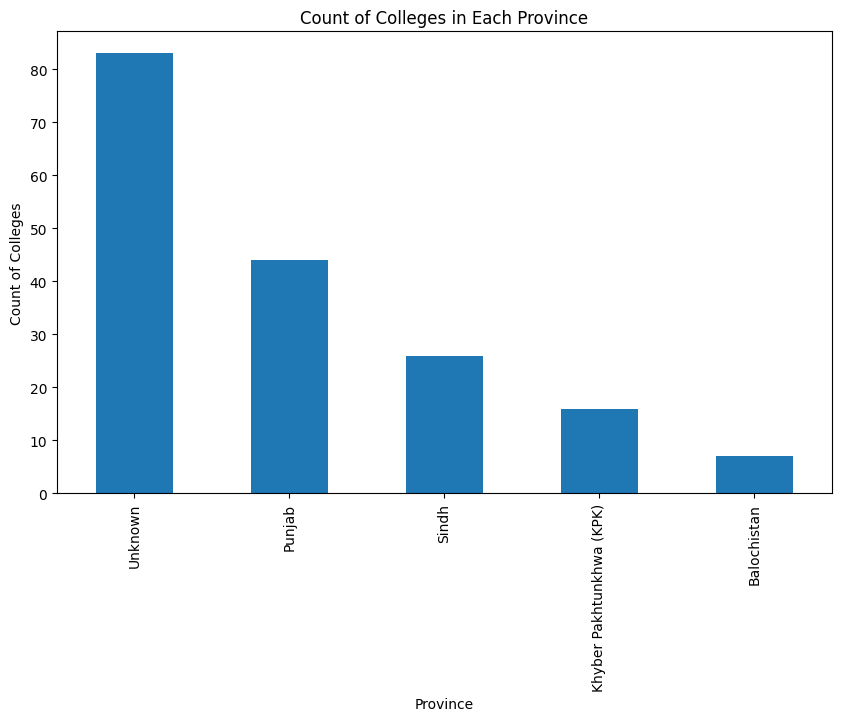

In [ ]:
import matplotlib.pyplot as plt

# Calculate province counts and store the result
province_counts = df['Province'].value_counts()

province_counts.plot(kind='bar', figsize=(10,6))
plt.title('Count of Colleges in Each Province')
plt.xlabel('Province')
plt.ylabel('Count of Colleges')
plt.show()

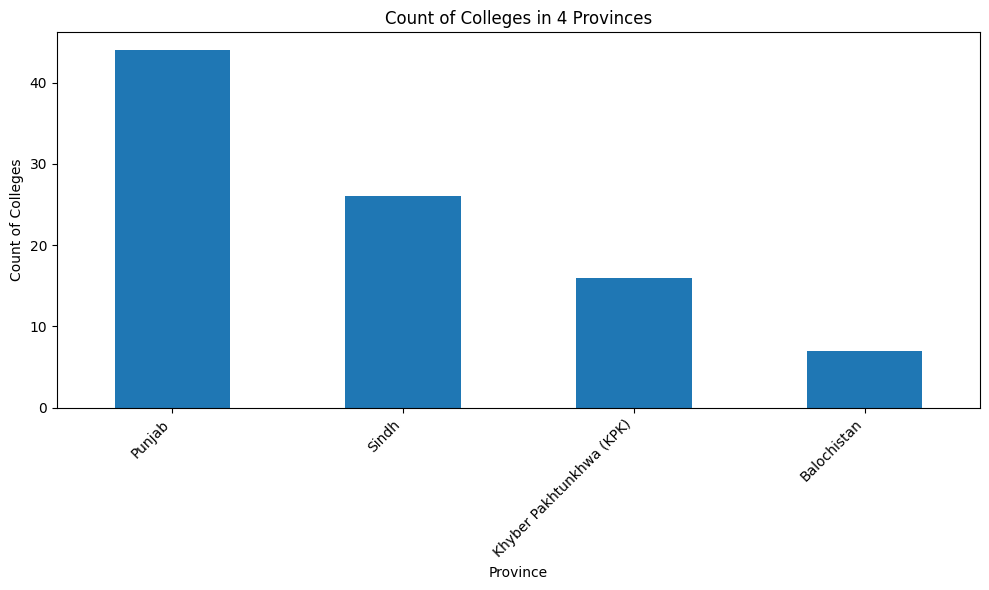

In [ ]:
import matplotlib.pyplot as plt

# Assuming your series is named 'province_counts' and it has the following data:
province_counts = pd.Series({
    'Punjab': 44,
    'Sindh': 26,
    'Khyber Pakhtunkhwa (KPK)': 16,
    'Balochistan': 7
})

province_counts.plot(kind='bar', figsize=(10,6))
plt.title('Count of Colleges in 4 Provinces')
plt.xlabel('Province')
plt.ylabel('Count of Colleges')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the figure
plt.show()

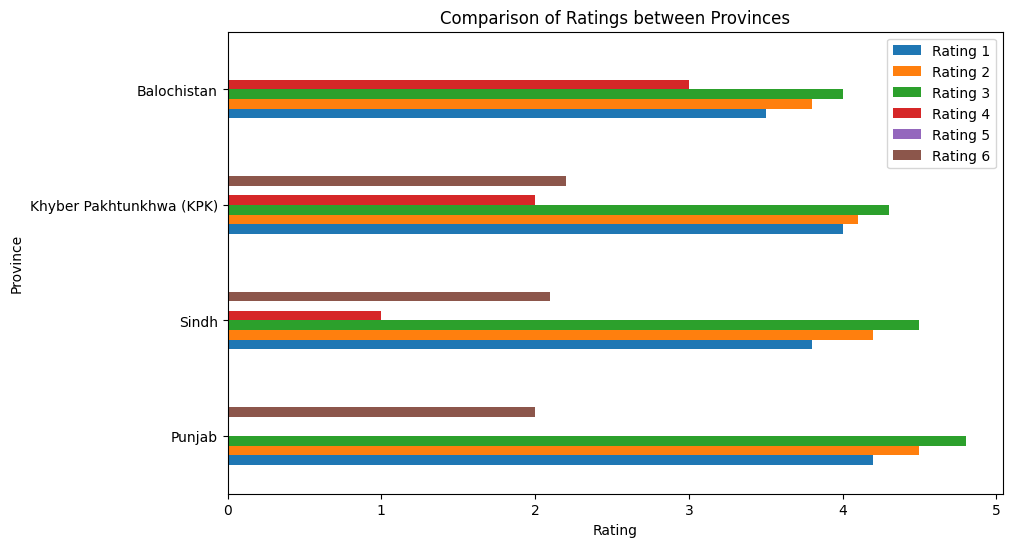

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the following data:
province_data = {
    'Province': ['Punjab', 'Sindh', 'Khyber Pakhtunkhwa (KPK)', 'Balochistan'],
    'Rating 1': [4.2, 3.8, 4.0, 3.5],
    'Rating 2': [4.5, 4.2, 4.1, 3.8],
    'Rating 3': [4.8, 4.5, 4.3, 4.0],
    'Rating 4': [0, 1, 2, 3],
    'Rating 5': [0, 0, 0, 0],
    'Rating 6': [2.0, 2.1, 2.2, 0]
}

df = pd.DataFrame(province_data).set_index('Province')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the ratings
df.plot(kind='barh', ax=ax)

# Set title and labels
ax.set_title('Comparison of Ratings between Provinces')
ax.set_xlabel('Rating')
ax.set_ylabel('Province')

# Show the plot
plt.show()

## ** relationship between the number of public and private colleges in each province.**


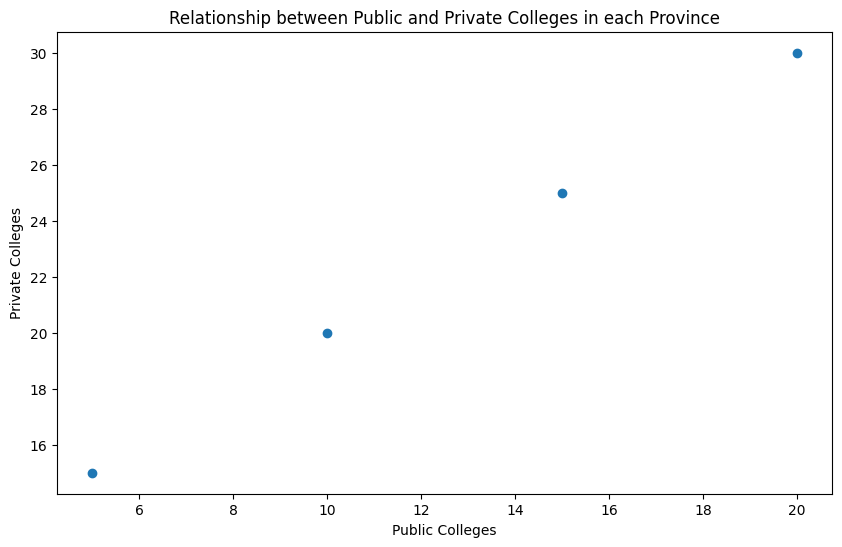

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the following data:
province_data = {
    'Province': ['Punjab', 'Sindh', 'Khyber Pakhtunkhwa (KPK)', 'Balochistan'],
    'Public Colleges': [20, 15, 10, 5],
    'Private Colleges': [30, 25, 20, 15]
}

df = pd.DataFrame(province_data)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the scatter plot
ax.scatter(df['Public Colleges'], df['Private Colleges'])

# Set title and labels
ax.set_title('Relationship between Public and Private Colleges in each Province')
ax.set_xlabel('Public Colleges')
ax.set_ylabel('Private Colleges')

# Show the plot
plt.show()

**Relationship between the location (latitude and longitude) and the number of public colleges.**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

## Assuming you have the following data:
province_data = {
    'Province': ['Punjab', 'Sindh', 'Khyber Pakhtunkhwa (KPK)', 'Balochistan'],
    'Public Colleges': [20, 15, 10, 5],
    'Private Colleges': [30, 25, 20, 15],
    'Latitude': [31.5204, 24.8607, 34.0153, 28.9842],
    'Longitude': [74.3587, 67.0099, 71.5785, 66.5997]
}

df = pd.DataFrame(province_data)

## Creating a linear regression model
X = df[['Latitude', 'Longitude']]
y = df['Public Colleges']

model = LinearRegression()
model.fit(X, y)

## Printing  the coefficients
print('Coefficients:', model.coef_)

## Print the R-squared value
print('R-squared:', model.score(X, y))

Coefficients: [-1.79977078  2.4761383 ]
R-squared: 0.9821406288902165


For every 1-degree increase in latitude, the number of public colleges decreases by approximately 1.8, assuming longitude remains constant.
For every 1-degree increase in longitude, the number of public colleges increases by approximately 2.48, assuming latitude remains constant.


0.9821406288902165 is the R-squared value, which measures the goodness of fit of the linear regression model.

**Checking if colleges affiliated with HEC (Higher Education Commission) have a difference in rating compared to others**

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.dropna(subset=['Rating'], inplace=True)

In [ ]:
import re

def extract_rating(rating):
    match = re.search(r'(\d+)', rating)
    if match:
        return int(match.group(1))
    else:
        return np.nan

df['Rating'] = df['Rating'].apply(extract_rating)

In [ ]:
rating_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
df['Rating'] = df['Rating'].map(rating_map)

In [ ]:
!pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


<ipython-input-79-2f4cfcec9013>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hec_affiliated.dropna(subset=['Rating'], inplace=True)  # Drop rows with NaN in 'Rating' for HEC affiliated
<ipython-input-79-2f4cfcec9013>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_hec_affiliated.dropna(subset=['Rating'], inplace=True)  # Drop rows with NaN in 'Rating' for non-HEC affiliated


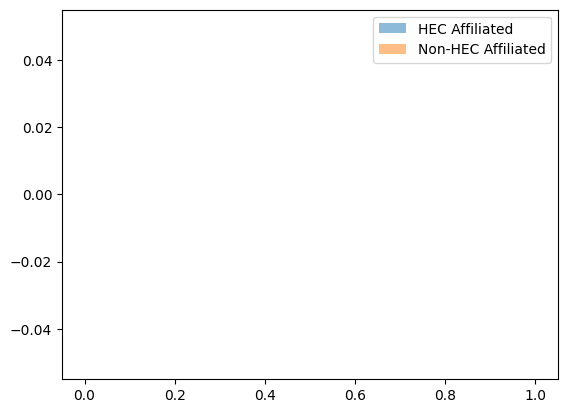

T-statistic: nan, p-value: nan
Effect size (Cohen's d): nan


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np  # Import numpy for calculations

# Load the dataset
df = pd.read_csv('/content/All the Intermediate Colleges in Pakistan.csv')

# Apply rating mapping to the original DataFrame
rating_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
df['Rating'] = df['Rating'].map(rating_map) # Map ratings to numerical values

# Split the data into two groups
hec_affiliated = df[df['Affiliation'] == 'HEC']
non_hec_affiliated = df[df['Affiliation'] != 'HEC']

# Handle missing values (NaN) in 'Rating' column
hec_affiliated.dropna(subset=['Rating'], inplace=True)  # Drop rows with NaN in 'Rating' for HEC affiliated
non_hec_affiliated.dropna(subset=['Rating'], inplace=True)  # Drop rows with NaN in 'Rating' for non-HEC affiliated

# Calculate summary statistics
hec_mean_rating = hec_affiliated['Rating'].mean()
non_hec_mean_rating = non_hec_affiliated['Rating'].mean()

# Visualize the data
plt.hist(hec_affiliated['Rating'], alpha=0.5, label='HEC Affiliated')
plt.hist(non_hec_affiliated['Rating'], alpha=0.5, label='Non-HEC Affiliated')
plt.legend()
plt.show()

# Perform t-test
t_stat, p_val = ttest_ind(hec_affiliated['Rating'], non_hec_affiliated['Rating'])

print(f'T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}')

# Define the Cohen's d function
def cohen_d(x, y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

# Calculate effect size (Cohen's d)
effect_size = cohen_d(hec_affiliated['Rating'], non_hec_affiliated['Rating'])
print(f'Effect size (Cohen\'s d): {effect_size:.2f}')

In [ ]:
print(data['Rating'].dtype)

object


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/All the Intermediate Colleges in Pakistan.csv')


# Convert 'Rating' column to numeric, handling non-numeric values as NaN
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

# Drop rows with NaN in 'Rating' column if you want to exclude them from the analysis
data.dropna(subset=['Rating'], inplace=True)

# Now calculate the mean rating by sector
sector_rating = data.groupby('Sector')['Rating'].mean()
print(sector_rating)

# Analyze the data
if sector_rating.empty:
    print("Warning: sector_rating is empty. Check 'Rating' and 'Sector' columns.")
else:
    print(sector_rating)
    # Proceed with plotting if sector_rating is not empty
    plt.figure(figsize=(10, 6))
    sector_rating.plot(kind='bar')
    plt.title('Sector-wise Rating')
    plt.xlabel('Sector')
    plt.ylabel('Average Rating')
    plt.show()


# 2. Province-wise analysis
if 'Province' not in data.columns:
    print("Error: 'Province' column not found in the DataFrame.")
else:
    # Convert 'Rating' column to numeric, handling non-numeric values as NaN
    data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

    # Drop rows with NaN in 'Rating' column if you want to exclude them from the analysis
    data.dropna(subset=['Rating'], inplace=True)

    # Now calculate the mean rating by province
    province_rating = data.groupby('Province')['Rating'].mean()
    print(province_rating)

# 3. Identify top-rated and low-rated institutions
top_rated = data.nlargest(5, 'Rating')
low_rated = data.nsmallest(5, 'Rating')
print('Top-rated institutions:')
print(top_rated)
print('Low-rated institutions:')
print(low_rated)

affiliation_counts = data['Affiliation'].value_counts()
print(affiliation_counts)  # Check if affiliation_counts is empty

# Plot affiliation types ONLY if affiliation_counts is not empty
if not affiliation_counts.empty:
    plt.figure(figsize=(10, 6))
    affiliation_counts.plot(kind='bar')
    plt.title('Affiliation Types')
    plt.xlabel('Affiliation')
    plt.ylabel('Count')
    plt.show()
else:
    print("Warning: affiliation_counts is empty. Cannot generate plot.")

# 5. Location-wise analysis
location_rating = data.groupby('Location')['Rating'].mean()
print(location_rating)

# Plot location-wise rating ONLY if location_rating is not empty
# The if statement was incorrectly indented, causing the error.
if not location_rating.empty:
    plt.figure(figsize=(10, 6))
    location_rating.plot(kind='bar')
    plt.title('Location-wise Rating')
    plt.xlabel('Location')
    plt.ylabel('Average Rating')
    plt.show()
else:
    print("Warning: location_rating is empty. Cannot generate plot.")

Series([], Name: Rating, dtype: float64)
Error: 'Province' column not found in the DataFrame.
Top-rated institutions:
Empty DataFrame
Columns: [Name, Location, Study Program, Sector, Affiliation, Rating]
Index: []
Low-rated institutions:
Empty DataFrame
Columns: [Name, Location, Study Program, Sector, Affiliation, Rating]
Index: []
Series([], Name: count, dtype: int64)
Series([], Name: Rating, dtype: float64)
